# Solving Quadratically Constrained Quadratic Programming Models


In [1]:
# load libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy.sparse as sp

import cplex as cp

### Finding minimal enclosing circle
The minimal enclosing circle problem is the problem of finding the circle of smallest radius that contains a given set of points in its interior or on its boundary. This smallest circle is known as the minimal enclosing circle.

The minimal enclosing circle problem in the plane is an example of a facility location problem in which the location of a new facility must be chosen to provide service to a number of customers, minimizing the farthest distance that any customer must travel to reach the new facility.

Let us assume that we are given $N$ locations $\{(a_{1}, b_{1}), (a_{2}, b_{2}), \dots, (a_{N}, b_{N})\}$ and we need to find the center of the minimal enclosing circle denoted as $(x, y)$ and the radius of this circle denoted as $r$. We can formulate the problem as the following QCQP:

\begin{align*}
\mbox{minimize} \;\;& r^{2} \\
\mbox{subject to:} \;\;& (a_{1} - x)^2 + (b_{1} - y)^2 \leq r^{2}\\
\;\;& (a_{2} - x)^2 + (b_{2} - y)^2 \leq r^{2} \\
\;\;& \vdots \\
\;\;& (a_{N} - x)^2 + (b_{N} - y)^2 \leq r^{2}
\end{align*}

$\;$

\begin{align*}
\mbox{minimize} \;\;& R \\
\mbox{subject to:} \;\;& -2a_{1}x - 2b_{1}y - R + x^{2} + y^{2} \leq -a_{1}^{2} -b_{1}^{2} \\
\;\;& -2a_{2}x - 2b_{2}y - R + x^{2} + y^{2} \leq -a_{2}^{2} -b_{2}^{2} \\
\;\;& \vdots \\
\;\;& -2a_{N}x - 2b_{N}y - R + x^{2} + y^{2} \leq -a_{N}^{2} -b_{N}^{2}
\end{align*}

$\;$

\begin{align*}
\mbox{minimize} \;\;& \begin{bmatrix}0 & 0 & 1\end{bmatrix} \begin{bmatrix} x\\ y\\ R\end{bmatrix} +  \dfrac{1}{2}\begin{bmatrix} x & y & R\end{bmatrix} \begin{bmatrix} 0 & 0 & 0\\ 0 & 0 & 0\\ 0 & 0 & 0\end{bmatrix} \begin{bmatrix} x\\ y\\ R\end{bmatrix} \\
\mbox{subject to:} \;\;& \begin{bmatrix}-2a_{1} & -2b_{1} & -1\end{bmatrix} \begin{bmatrix} x\\ y\\ R\end{bmatrix} +  \begin{bmatrix} x & y & R\end{bmatrix} \begin{bmatrix} 1 & 0 & 0\\ 0 & 1 & 0\\ 0 & 0 & 0\end{bmatrix} \begin{bmatrix} x\\ y\\ R\end{bmatrix} \leq -a_{1}^{2} -b_{1}^{2} \\
\;\;& \begin{bmatrix}-2a_{2} & -2b_{2} & -1\end{bmatrix} \begin{bmatrix} x\\ y\\ R\end{bmatrix} +  \begin{bmatrix} x & y & R\end{bmatrix} \begin{bmatrix} 1 & 0 & 0\\ 0 & 1 & 0\\ 0 & 0 & 0\end{bmatrix} \begin{bmatrix} x\\ y\\ R\end{bmatrix} \leq -a_{2}^{2} -b_{2}^{2} \\
\;\;& \vdots \\
\;\;& \begin{bmatrix}-2a_{N} & -2b_{N} & -1\end{bmatrix} \begin{bmatrix} x\\ y\\ R\end{bmatrix} +  \begin{bmatrix} x & y & R\end{bmatrix} \begin{bmatrix} 1 & 0 & 0\\ 0 & 1 & 0\\ 0 & 0 & 0\end{bmatrix} \begin{bmatrix} x\\ y\\ R\end{bmatrix} \leq -a_{N}^{2} -b_{N}^{2}
\end{align*}

In [2]:
def minimal_enclosing_circle(coordinates):
    N = coordinates.shape[0]

    # create an empty optimization problem
    prob = cp.Cplex()

    # add decision variables to the problem including their linear coefficients in objective and ranges
    prob.variables.add(obj = [0, 0, 1],
                       lb = [-cp.infinity, -cp.infinity, 0],
                       ub = [+cp.infinity, +cp.infinity, +cp.infinity],
                       names = ["x", "y", "R"])

    # define problem type
    prob.objective.set_sense(prob.objective.sense.minimize)

    # add quadratic constraints to the problem including their directions and right-hand side values
    for i in range(N):
        prob.quadratic_constraints.add(lin_expr = cp.SparsePair([0, 1, 2],
                                                                [-2 * coordinates[i, 0], -2 * coordinates[i, 1], -1]),
                                       quad_expr = cp.SparseTriple(ind1 = [0, 1], ind2 = [0, 1], val = [1, 1]),
                                       sense = "L", rhs = -coordinates[i, 0]**2 - coordinates[i, 1]**2)

    print(prob.write_as_string())

    # solve the problem
    prob.solve()

    # check the solution status
    print(prob.solution.get_status())
    print(prob.solution.status[prob.solution.get_status()])

    # get the solution
    x_star, y_star, R_star = prob.solution.get_values()
    r_star = np.sqrt(R_star)

    return(x_star, y_star, r_star)

In [3]:
coordinates = np.array([[3, 4],
                        [3, 2],
                        [7, 2],
                        [3, 8],
                        [5, 3]]).astype("float")

x_star, y_star, r_star = minimal_enclosing_circle(coordinates)

Default row names c1, c2 ... being created.


\ENCODING=ISO-8859-1
\Problem name: 

Minimize
 obj1: 0 x + 0 y + R
Subject To
 q1: - 6 x - 8 y - R + [ x ^2 + y ^2 ] <= -25
 q2: - 6 x - 4 y - R + [ x ^2 + y ^2 ] <= -13
 q3: - 14 x - 4 y - R + [ x ^2 + y ^2 ] <= -53
 q4: - 6 x - 16 y - R + [ x ^2 + y ^2 ] <= -73
 q5: - 10 x - 6 y - R + [ x ^2 + y ^2 ] <= -34
Bounds
      x Free
      y Free
End

Version identifier: 22.1.0.0 | 2022-03-09 | 1a383f8ce
CPXPARAM_Read_DataCheck                          1
Tried aggregator 1 time.
Reduced QCP has 18 rows, 21 columns, and 46 nonzeros.
Reduced QCP has 5 quadratic constraints.
Presolve time = 0.00 sec. (0.01 ticks)
Parallel mode: using up to 2 threads for barrier.
Number of nonzeros in lower triangle of A*A' = 103
Using Approximate Minimum Degree ordering
Total time for automatic ordering = 0.00 sec. (0.00 ticks)
Summary statistics for Cholesky factor:
  Threads                   = 2
  Rows in Factor            = 18
  Integer space required    = 18
  Total non-zeros in factor = 171
  Total FP o

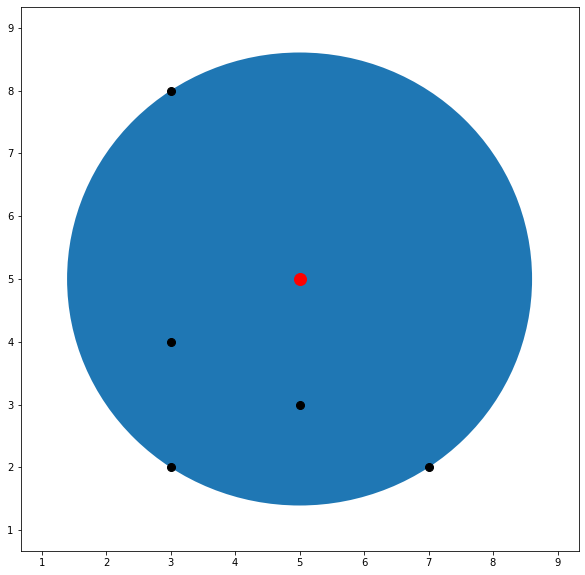

In [4]:
figure, axes = plt.subplots(figsize = (10, 10))
draw_circle = plt.Circle((x_star, y_star), radius = r_star)
axes.add_artist(draw_circle)
plt.plot(coordinates[:,0], coordinates[:,1], "o", color = "black", markersize = 8)
plt.plot(x_star, y_star, "o", color = "red", markersize = 12)
plt.xlim([x_star - 1.2 * r_star, x_star + 1.2 * r_star])
plt.ylim([y_star - 1.2 * r_star, y_star + 1.2 * r_star])
plt.show()

In [5]:
coordinates = np.random.uniform(low = 2, high = 8, size = 50).reshape((25, 2))

x_star, y_star, r_star = minimal_enclosing_circle(coordinates)

Default row names c1, c2 ... being created.


\ENCODING=ISO-8859-1
\Problem name: 

Minimize
 obj1: 0 x + 0 y + R
Subject To
 q1:  - 11.5373563339109 x - 6.5551121216095 y - R + [ x ^2 + y ^2 ]
      <= -44.0200215256266
 q2:  - 15.5945319167268 x - 9.92233983443212 y - R + [ x ^2 + y ^2 ]
      <= -85.4105633729419
 q3:  - 15.0780758038568 x - 9.04240000023887 y - R + [ x ^2 + y ^2 ]
      <= -77.2783419277926
 q4:  - 14.7112703259033 x - 5.82714642822064 y - R + [ x ^2 + y ^2 ]
      <= -62.5942775244317
 q5:  - 5.90635508063365 x - 6.94151537918437 y - R + [ x ^2 + y ^2 ]
      <= -20.767416524495
 q6:  - 8.32393956123102 x - 8.76981758174301 y - R + [ x ^2 + y ^2 ]
      <= -36.5494175590189
 q7:  - 7.13104859005669 x - 6.60214989618856 y - R + [ x ^2 + y ^2 ]
      <= -23.610059311373
 q8:  - 11.8976102817303 x - 5.77253180919437 y - R + [ x ^2 + y ^2 ]
      <= -43.7188134760241
 q9:  - 7.30376136639362 x - 7.64395159031015 y - R + [ x ^2 + y ^2 ]
      <= -27.9437315030573
 q10: - 10.8251004652417 x - 14.6961247038752 y - R

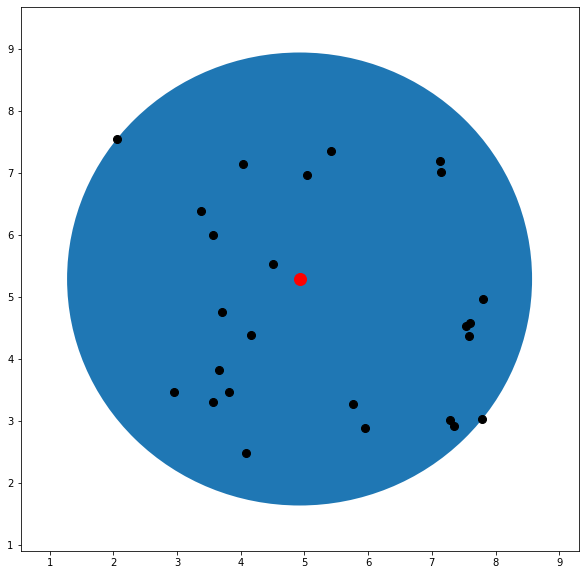

In [6]:
figure, axes = plt.subplots(figsize = (10, 10))
draw_circle = plt.Circle((x_star, y_star), radius = r_star)
axes.add_artist(draw_circle)
plt.plot(coordinates[:,0], coordinates[:,1], "o", color = "black", markersize = 8)
plt.plot(x_star, y_star, "o", color = "red", markersize = 12)
plt.xlim([x_star - 1.2 * r_star, x_star + 1.2 * r_star])
plt.ylim([y_star - 1.2 * r_star, y_star + 1.2 * r_star])
plt.show()